Preparing the data

In [479]:
import numpy as np
import matplotlib.pyplot as plt

In [480]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
target = boston.target
features = boston.feature_names
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(data)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=80718)

y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), 1)
X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), 1)

print(X_train.shape)
print(X_test.shape)

(354, 14)
(152, 14)


/Users/hemanth/opt/anaconda3/envs/ML/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

In [481]:
def shuffle_data(x, y):
    perm = np.random.permutation(x.shape[0])
    return x[perm], y[perm]

In [482]:
def backward(forward_info, weights):
    dLdP = -2*(forward_info['y']-forward_info['p'])
    dPdW = np.transpose(forward_info['x'], (1,0))

    gradient = np.dot(dPdW, dLdP)

    return gradient

In [483]:
def generate_batch(x, y, start, batch_size):
    if start + batch_size > x.shape[0]:
        batch_size = x.shape[0]-start
    x_batch, y_batch = x[start:start+batch_size], y[start: start+batch_size]

    return x_batch, y_batch

In [484]:
def forward_loss(x, y, weights):
    P = np.dot(x, weights)

    loss = np.mean(np.power(y-P, 2))

    forward_info = {}
    forward_info['x'] = x
    forward_info['p'] = P
    forward_info['y'] = y

    return forward_info, loss

In [485]:
def init_weights(n):
    return np.random.randn(n, 1)

In [486]:
def train(x, y, iter, lr=0.01, batch_size=100, seed=1):
    losses = []
    if seed:
        np.random.seed(seed)
    start = 0
    weights = init_weights(x.shape[1])
    for i in range(iter):
        if start>=x.shape[0]:
            start = 0
            x, y = shuffle_data(x, y)
        x_batch, y_batch = generate_batch(x, y, start, batch_size)
        start+=batch_size

        forward_info, loss = forward_loss(x_batch, y_batch, weights)
        losses.append(loss)
        gradients = backward(forward_info, weights)
        weights -= lr*gradients
    return losses, weights



In [487]:
train_info = train(X_train, y_train, 900, 0.001, 23, seed=180780)

losses = train_info[0]
weights = train_info[1]


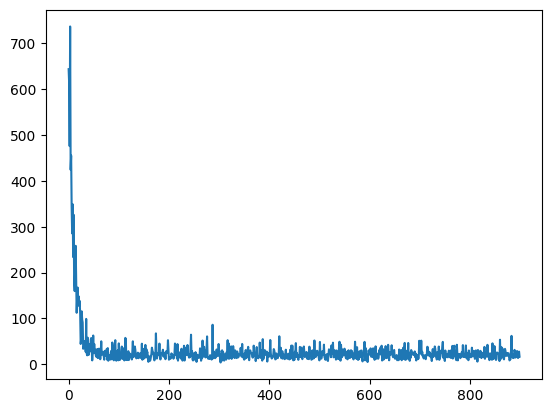

In [488]:
plt.plot(list(range(900)), losses)


In [16]:
def predict(x_test, weights):
    return np.dot(x_test, weights)
preds = predict(X_test, weights)

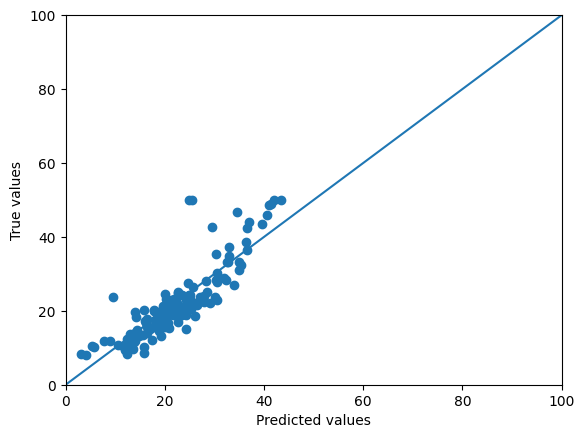

In [17]:
plt.scatter(preds, y_test)
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.xlim([0,100])
plt.ylim([0,100])
plt.plot([0,100], [0,100])